In [1]:
import numpy as np
import pandas as pd
import sim_fa as sf
import factor_analysis as fa
import matplotlib.pyplot as plt
from timeit import default_timer as timer

early_stop = True
n_trials = 600
n_neurons = 150
n_latents = 8
rand_seed = 100

# simulate from a factor analysis model
fa_simulator = sf.sim_fa(n_neurons,n_latents,model_type='fa',rand_seed=rand_seed)
X = fa_simulator.sim_data(n_trials,rand_seed=rand_seed)
sim_params = fa_simulator.get_params()

# # fit fa model
# model = fa.factor_analysis(model_type='fa')
# log_L = model.train(X,5,verbose=False,rand_seed=0)
# fit_params = model.get_params()

# cross-validation
model = fa.factor_analysis(model_type='fa')
LL,testLL = model.train(X,5)
start = timer()
cv_faMdl = model.crossvalidate(X,early_stop=early_stop,rand_seed=rand_seed)
LLs,zDim_list,max_LL,zDim = cv_faMdl['LLs'],cv_faMdl['z_list'],cv_faMdl['final_LL'],cv_faMdl['zDim']
end = timer()


Crossvalidating FA model to choose # of dims...
   Fold  1  of  10 ...
   Fold  2  of  10 ...
   Fold  3  of  10 ...
   Fold  4  of  10 ...
   Fold  5  of  10 ...
   Fold  6  of  10 ...
   Fold  7  of  10 ...
   Fold  8  of  10 ...
   Fold  9  of  10 ...
   Fold  10  of  10 ...


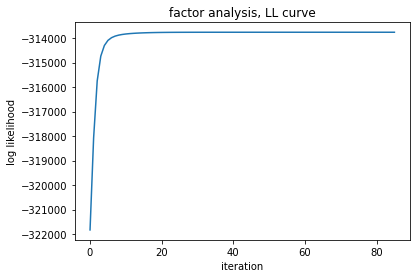

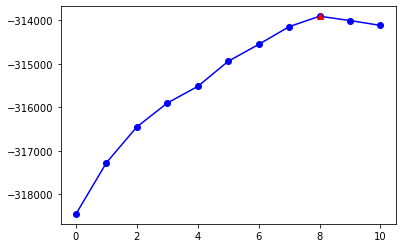

In [2]:
# # plot fa fitting log-likelihood (no cross-validation)
# plt.figure(0)
# plt.plot(LL)
# plt.xlabel('iteration')
# plt.ylabel('log likelihood')
# plt.title('factor analysis, LL curve')
# plt.show()

# # plot cross-validation curve
# plt.figure(0)
# plt.plot(zDim_list,LLs,'bo-')
# plt.plot(zDim,max_LL,'r^')
# plt.show()

In [3]:
# # get latents and compare recovered latents vs true latents
# z_fit,LL_fit = model.estep(X)
# z_fit,Lorth = model.orthogonalize(z_fit['z_mu'])

# sim_model = fa.factor_analysis(model_type='fa')
# sim_model.set_params(sim_params)
# z_true,LL_true = sim_model.estep(X)
# z_true,Lorth = sim_model.orthogonalize(z_true['z_mu'])

# plt.figure(1)
# plt.plot(z_true[:,0],z_fit[:,0],'b.')
# plt.xlabel('True z1')
# plt.ylabel('Recovered z1')
# plt.show()

[Text(1, 0, 'training'), Text(2, 0, 'heldout')]

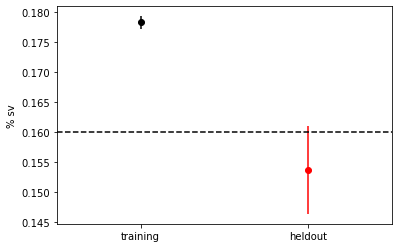

In [4]:
# compute fa metrics
model.train_earlyStop(X,zDim,rand_seed=rand_seed)
eStop_metrics = model.compute_earlyStop_metrics(cutoff_thresh=0.95)
fitted_metrics = model.compute_metrics(cutoff_thresh=0.95)
train_psv,test_psv = model.compute_cv_psv(X,zDim,n_boots=50,\
    rand_seed=rand_seed,return_each=True,test_size=0.1,early_stop=True)
sim_model = fa.factor_analysis(model_type='fa')
sim_model.set_params(sim_params)
true_metrics = sim_model.compute_metrics(cutoff_thresh=0.95)

fig,ax = plt.subplots(1,1)
ax.errorbar(1,np.mean(train_psv),yerr=np.std(train_psv),fmt='ko',label='training')
ax.errorbar(2,np.mean(test_psv),yerr=np.std(test_psv),fmt='ro',label='heldout')
ax.set_xlim([0.5,2.5])
ax.plot(ax.get_xlim(),np.ones(2)*true_metrics['psv'],'k--',label='true')
ax.set_ylabel('% sv')
ax.set_xticks([1,2])
ax.set_xticklabels(['training','heldout'])

# print('ground truth psv:',true_metrics['psv'])
# print('training psvs:',train_psv)
# print('test psvs:',test_psv)
# print('fitted dshared:',fitted_metrics['dshared'])
# print('ground truth dshared:',true_metrics['dshared'])
# print('fitted participation ratio: {:.2f}'.format(fitted_metrics['part_ratio']))
# print('ground truth participation ratio: {:.2f}'.format(true_metrics['part_ratio']))
